In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec


In [4]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")


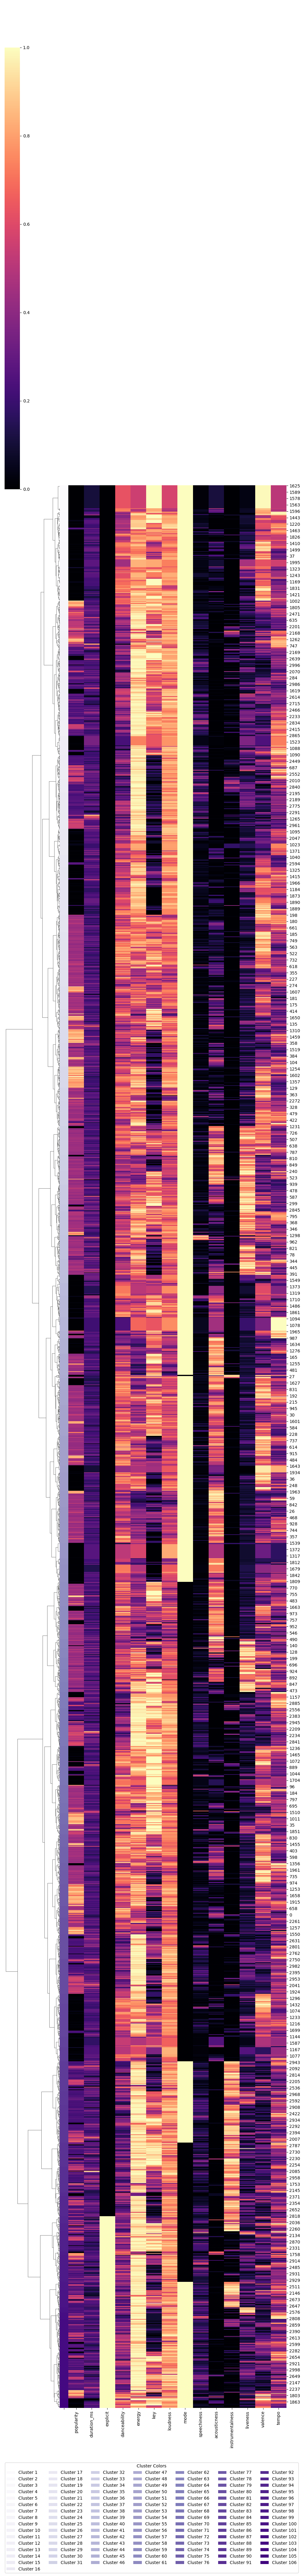

   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          66       151565     False         0.765   0.497    1    -7.806   
1          65        89293     False         0.720   0.422    1   -13.338   
2          49       259066     False         0.632   0.651    7    -8.658   
3          49       216446     False         0.610   0.420    4   -10.889   
4          50       273906     False         0.580   0.330    7   -13.703   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.0402         0.492          0.366000    0.1430    0.457   
1     0       0.0690         0.474          0.084700    0.1550    0.546   
2     0       0.0401         0.756          0.000004    0.7260    0.652   
3     0       0.0462         0.815          0.000000    0.1230    0.553   
4     1       0.0295         0.596          0.000001    0.0849    0.373   

     tempo  cluster  
0  112.195       79  
1  112.219       79  
2  119.567       65 

In [2]:


# Load data
X = df.iloc[:, 6:20]

# Step 2: Normalize using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Step 3: Perform hierarchical clustering
Z = linkage(normalized_data, method='ward', metric='euclidean')

# Step 4: Extract flat clusters (e.g., k=106 groups)
num_clusters = 106
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Step 5: Create color palette for clusters
palette = sns.color_palette("Purples", num_clusters)
cluster_to_color = {cluster: palette[i] for i, cluster in enumerate(np.unique(clusters))}
row_colors = pd.Series(clusters, index=normalized_data.index).map(cluster_to_color)

# Step 6: Plot clustermap
g = sns.clustermap(normalized_data,
                   row_linkage=Z,
                   col_cluster=False,
                   row_colors=row_colors,
                   cmap="magma",
                   figsize=(10, 80))

# Step 7: Create custom legend (showing a subset for readability)
# Show only first 10 clusters in legend to avoid clutter
legend_clusters = list(cluster_to_color.keys())
legend_elements = [Patch(facecolor=cluster_to_color[cl], label=f'Cluster {cl}') for cl in legend_clusters]

# Place the legend below the heatmap
plt.gcf().legend(handles=legend_elements,
                 title='Cluster Colors',
                 loc='lower center',
                 ncol=7,
                 bbox_to_anchor=(0.5, -0.05))

plt.show()

# Step 8: Attach cluster labels to the original data
result = X.copy()
result['cluster'] = clusters

# Step 9: Output result
print(result.head())
# result.to_csv('clustered_output.csv')


In [3]:
result

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,66,151565,False,0.765,0.497,1,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,79
1,65,89293,False,0.720,0.422,1,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,79
2,49,259066,False,0.632,0.651,7,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,65
3,49,216446,False,0.610,0.420,4,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,60
4,50,273906,False,0.580,0.330,7,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,20,91866,False,0.474,0.993,1,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,16
2996,0,227616,False,0.370,0.993,7,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,10
2997,21,162973,True,0.307,0.976,2,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,98
2998,22,135893,True,0.362,0.994,6,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,104


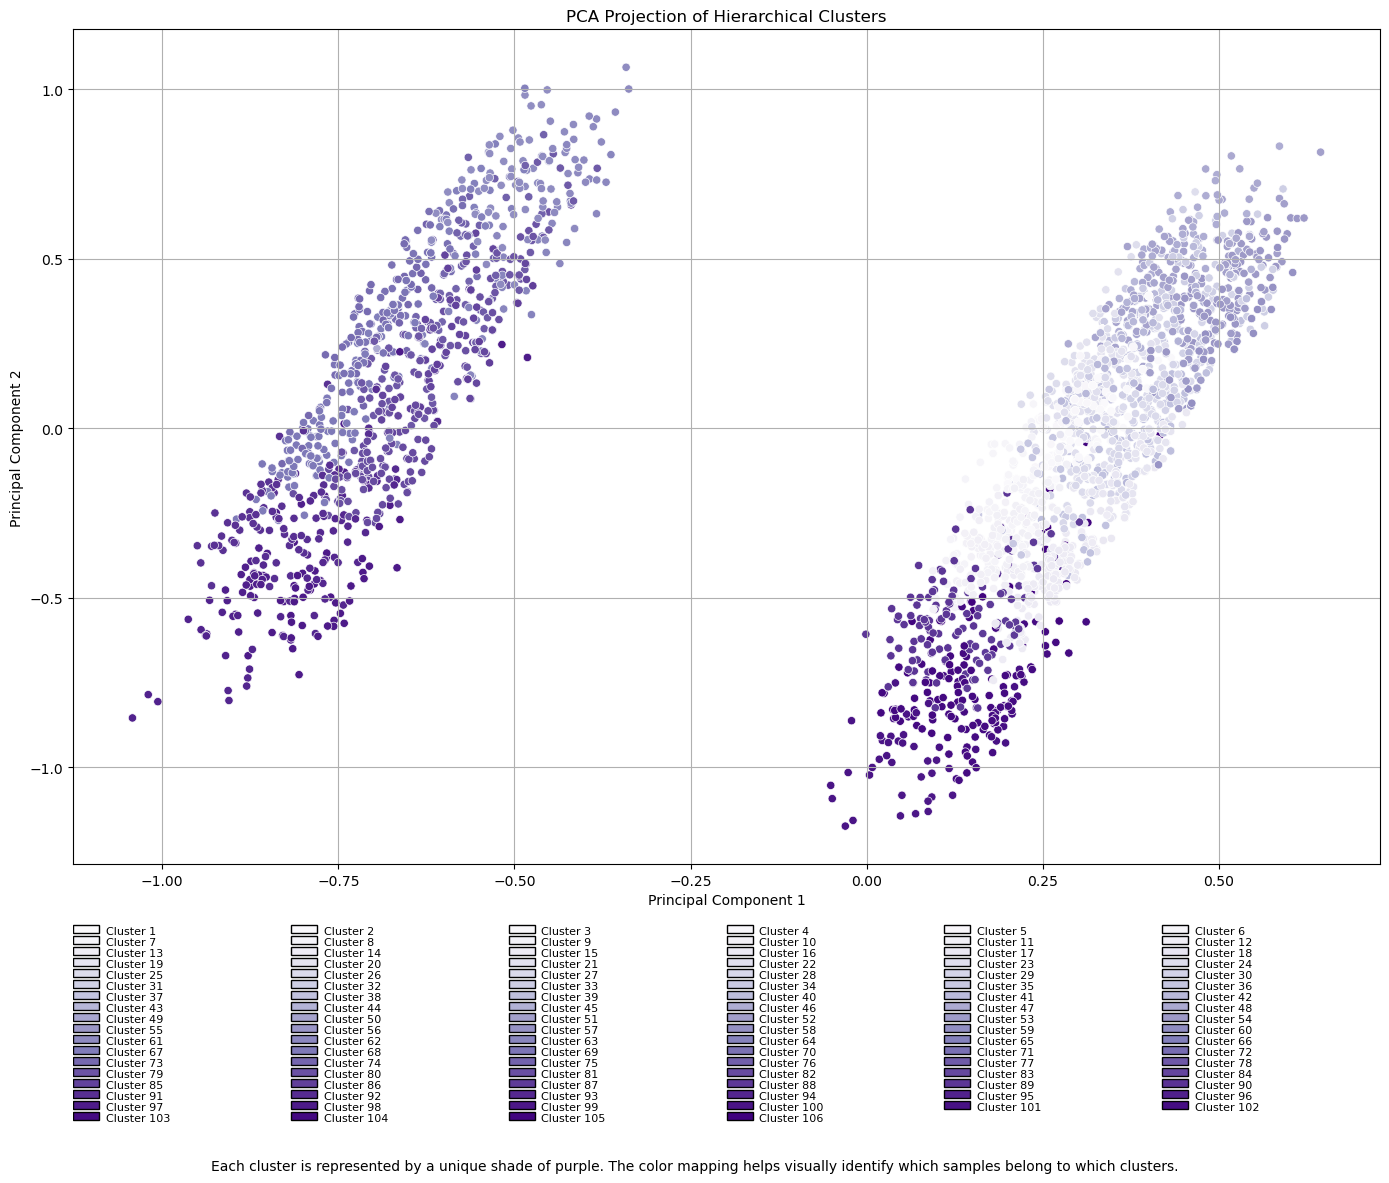

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.patches as mpatches

# --- Load and Normalize Data ---
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
X = df.iloc[:, 6:20]

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --- Hierarchical Clustering ---
Z = linkage(normalized_data, method='ward', metric='euclidean')
num_clusters = 106
clusters = fcluster(Z, num_clusters, criterion='maxclust')
normalized_data['cluster'] = clusters

# --- PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data.drop(columns='cluster'))
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# --- Color Palette ---
palette = sns.color_palette("Purples", num_clusters)
cluster_colors = [palette[c - 1] for c in pca_df['cluster']]

# --- Create Figure and Plot ---
fig, (ax_main, ax_legend) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [4, 1]})

# --- PCA Scatterplot (no text annotations) ---
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette=palette, legend=False, ax=ax_main)
ax_main.set_title("PCA Projection of Hierarchical Clusters")
ax_main.set_xlabel("Principal Component 1")
ax_main.set_ylabel("Principal Component 2")
ax_main.grid(True)

# --- Cluster Color Legend Below ---
ax_legend.axis('off')
n_cols = 6
n_rows = -(-num_clusters // n_cols)  # Ceiling division

x_spacing = 1.0 / n_cols
y_spacing = 1.0 / (n_rows + 1)

for i in range(num_clusters):
    col = i % n_cols
    row = i // n_cols
    x = col * x_spacing
    y = 1 - (row + 1) * y_spacing

    color_patch = mpatches.Rectangle((x, y), 0.02, 0.04, transform=ax_legend.transAxes,
                                     facecolor=palette[i], edgecolor='black')
    ax_legend.add_patch(color_patch)
    ax_legend.text(x + 0.025, y + 0.01, f'Cluster {i + 1}', transform=ax_legend.transAxes,
                   fontsize=8, va='center')

# --- Caption ---
plt.figtext(0.5, 0.02, "Each cluster is represented by a unique shade of purple. The color mapping helps visually identify which samples belong to which clusters.",
            ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


In [41]:
df_cluster_PCA = pd.merge(result, pca_df, left_index=True, right_index=True)
del df_cluster_PCA["cluster_y"]
df_cluster_PCA
len(df_cluster_PCA)
(df_cluster_PCA["PC2"].isna()).value_counts()
df_cluster_PCA = df_cluster_PCA.reset_index()
df_cluster_PCA

,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_x,PC1,PC2
0,0,66,151565,False,0.765,0.497,1,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,79,-0.517205,0.462498
1,1,65,89293,False,0.720,0.422,1,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,79,-0.451345,0.638049
2,2,49,259066,False,0.632,0.651,7,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,65,-0.495144,0.722466
3,3,49,216446,False,0.610,0.420,4,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,60,-0.428134,0.813609
4,4,50,273906,False,0.580,0.330,7,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,50,0.434998,0.448380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,20,91866,False,0.474,0.993,1,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,16,0.281309,-0.424130
2996,2996,0,227616,False,0.370,0.993,7,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,10,0.181394,-0.440955
2997,2997,21,162973,True,0.307,0.976,2,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,98,-0.753654,-0.515405
2998,2998,22,135893,True,0.362,0.994,6,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,104,0.148060,-0.714397


In [42]:
pc1 = (df_cluster_PCA["PC1"]).to_list()
pc2 = (df_cluster_PCA["PC2"]).to_list()
PCdistance = list()

#0.25 0
#

def getPCEuclidianDistanceWithXSIGN(X, Y):
    if (X<(-0.25)): 
        return (np.sqrt((X - (-0.25))**2 + (Y - 0)**2)) * (-1)
    else:
        return (np.sqrt((X - (-0.25))**2 + (Y - 0)**2))

index =0
for value in range (len(pc1)):
    PCdistance.append(getPCEuclidianDistanceWithXSIGN(pc1[index], pc2[index]))
    index +=1
    

PCAdistanceDf = pd.DataFrame({"PCA_EuclidianDist(Xsign)" : PCdistance})

df_cluster_PCA = pd.merge(df_cluster_PCA,PCAdistanceDf, left_index=True, right_index=True)

df_cluster_PCA


,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_x,PC1,PC2,PCA_EuclidianDist(Xsign)
0,0,66,151565,False,0.765,0.497,1,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,79,-0.517205,0.462498,-0.534137
1,1,65,89293,False,0.720,0.422,1,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,79,-0.451345,0.638049,-0.669064
2,2,49,259066,False,0.632,0.651,7,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,65,-0.495144,0.722466,-0.762924
3,3,49,216446,False,0.610,0.420,4,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,60,-0.428134,0.813609,-0.832881
4,4,50,273906,False,0.580,0.330,7,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,50,0.434998,0.448380,0.818698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,20,91866,False,0.474,0.993,1,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,16,0.281309,-0.424130,0.679835
2996,2996,0,227616,False,0.370,0.993,7,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,10,0.181394,-0.440955,0.616881
2997,2997,21,162973,True,0.307,0.976,2,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,98,-0.753654,-0.515405,-0.720631
2998,2998,22,135893,True,0.362,0.994,6,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,104,0.148060,-0.714397,0.817811


In [57]:


def gettingGroup_1thBoundaryDF(df):
    group = []
    for value in df_cluster_PCA["PCA_EuclidianDist(Xsign)"]:
        if value < 0:
            group.append(-1) 
        else:
            group.append(1)
            
    group_df = pd.DataFrame({"1th_Boundary": group})
    df = pd.merge(df,group_df, left_index=True, right_index=True)
    return df


df_cluster_PCA_gp = gettingGroup_1thBoundaryDF(df_cluster_PCA)
df_cluster_PCA_gp.to_csv("df_cluster_PCA_gp")


In [5]:
df_cluster_PCA_gp = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/df_cluster_PCA_gp.csv")
df_cluster_PCA_gp = pd.merge(df["track_genre"],df_cluster_PCA_gp, right_index=True, left_index=True )

groupA = df_cluster_PCA_gp[df_cluster_PCA_gp["1th_Boundary"] == -1]
groupB = df_cluster_PCA_gp[df_cluster_PCA_gp["1th_Boundary"] == 1]




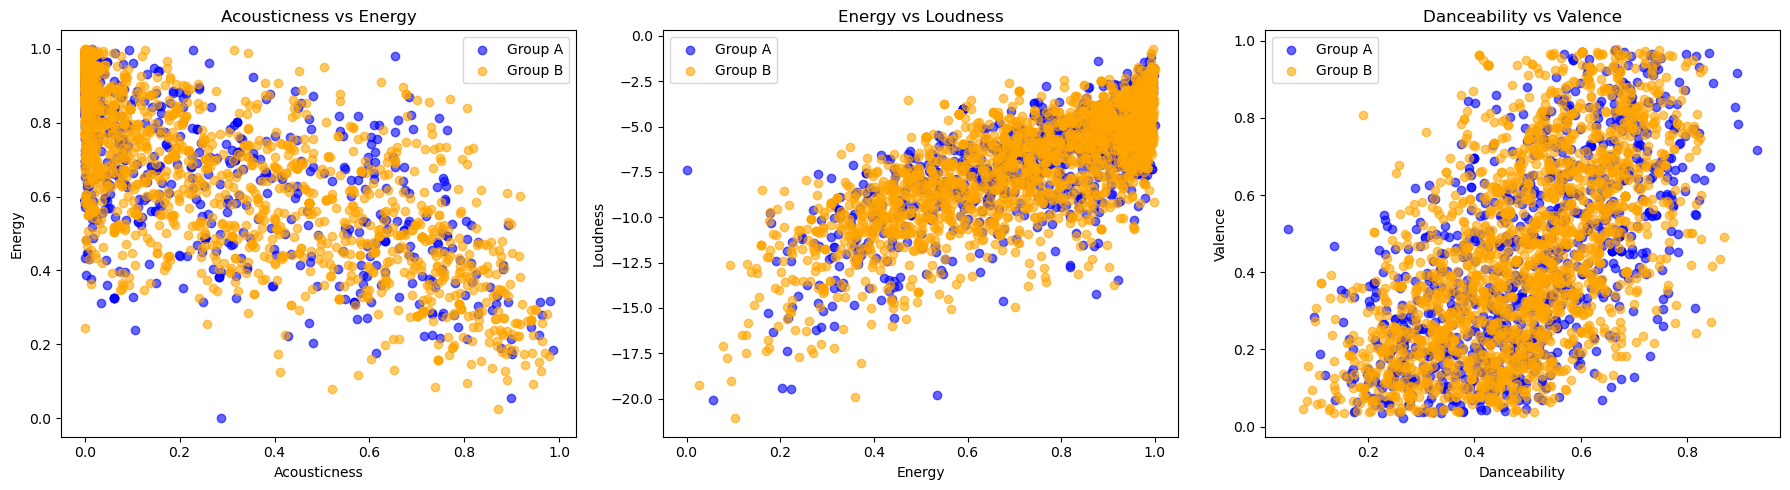

In [8]:


# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Acousticness vs Energy
axes[0].scatter(groupA["acousticness"], groupA["energy"], color='blue', label='Group A', alpha=0.6)
axes[0].scatter(groupB["acousticness"], groupB["energy"], color='orange', label='Group B', alpha=0.6)
axes[0].set_xlabel("Acousticness")
axes[0].set_ylabel("Energy")
axes[0].set_title("Acousticness vs Energy")

# Plot 2: Energy vs Loudness
axes[1].scatter(groupA["energy"], groupA["loudness"], color='blue', label='Group A', alpha=0.6)
axes[1].scatter(groupB["energy"], groupB["loudness"], color='orange', label='Group B', alpha=0.6)
axes[1].set_xlabel("Energy")
axes[1].set_ylabel("Loudness")
axes[1].set_title("Energy vs Loudness")

# Plot 3: Danceability vs Valence
axes[2].scatter(groupA["danceability"], groupA["valence"], color='blue', label='Group A', alpha=0.6)
axes[2].scatter(groupB["danceability"], groupB["valence"], color='orange', label='Group B', alpha=0.6)
axes[2].set_xlabel("Danceability")
axes[2].set_ylabel("Valence")
axes[2].set_title("Danceability vs Valence")

# Add legend and show plot
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()


In [15]:
# Extract feature names
feature_names = normalized_data.drop(columns='cluster').columns

# Get PCA loadings (component weights)
pca_components = pd.DataFrame(
    data=pca.components_,
    columns=feature_names,
    index=['PC1', 'PC2']
)

# Show weights
print(pca_components.T.sort_values(by='PC1', ascending=False))  # sorted by PC1 for clarity


                       PC1       PC2
mode              0.941287 -0.270838
acousticness      0.177116  0.503884
valence           0.092582  0.322209
danceability      0.046262  0.257952
liveness          0.018852 -0.006056
tempo             0.006292 -0.061811
duration_ms      -0.020770 -0.026353
popularity       -0.045738  0.048381
speechiness      -0.046865 -0.120539
loudness         -0.064208 -0.217542
explicit         -0.082406 -0.404737
instrumentalness -0.122890 -0.285855
energy           -0.134029 -0.417181
key              -0.151006  0.118654


In [14]:
print(pca.components_.shape)


(2, 14)
